# Covid-19 Vaccines Prediction using Prophet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Covid-19 Vaccines
title = "COVID-19"
symbols = ['BNTX', 'JNJ', 'MRNA', 'PFE']
start = '2020-01-01'
end = '2022-09-03'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2020-01-02,37.996727,135.936539,19.230000,33.538967
2020-01-03,39.526466,134.362701,18.889999,33.359020
2020-01-06,43.997250,134.195114,18.129999,33.316174
2020-01-07,42.773460,135.014572,17.780001,33.204781
2020-01-08,44.510452,134.995972,17.980000,33.470421


In [5]:
df = df.reset_index()
df

,Date,BNTX,JNJ,MRNA,PFE
0,2020-01-02,37.996727,135.936539,19.230000,33.538967
1,2020-01-03,39.526466,134.362701,18.889999,33.359020
2,2020-01-06,43.997250,134.195114,18.129999,33.316174
3,2020-01-07,42.773460,135.014572,17.780001,33.204781
4,2020-01-08,44.510452,134.995972,17.980000,33.470421
...,...,...,...,...,...
669,2022-08-29,144.630005,163.000000,137.259995,46.230000
670,2022-08-30,147.080002,162.429993,135.929993,45.849998
671,2022-08-31,144.639999,161.339996,132.270004,45.230000
672,2022-09-01,147.809998,165.339996,138.949997,46.630001


In [6]:
df1 = df[['Date', 'BNTX']]
df1

,Date,BNTX
0,2020-01-02,37.996727
1,2020-01-03,39.526466
2,2020-01-06,43.997250
3,2020-01-07,42.773460
4,2020-01-08,44.510452
...,...,...
669,2022-08-29,144.630005
670,2022-08-30,147.080002
671,2022-08-31,144.639999
672,2022-09-01,147.809998


In [7]:
df2 = df[['Date', 'JNJ']]
df2
    

,Date,JNJ
0,2020-01-02,135.936539
1,2020-01-03,134.362701
2,2020-01-06,134.195114
3,2020-01-07,135.014572
4,2020-01-08,134.995972
...,...,...
669,2022-08-29,163.000000
670,2022-08-30,162.429993
671,2022-08-31,161.339996
672,2022-09-01,165.339996


In [8]:
df3 = df[['Date', 'MRNA']]
df3

,Date,MRNA
0,2020-01-02,19.230000
1,2020-01-03,18.889999
2,2020-01-06,18.129999
3,2020-01-07,17.780001
4,2020-01-08,17.980000
...,...,...
669,2022-08-29,137.259995
670,2022-08-30,135.929993
671,2022-08-31,132.270004
672,2022-09-01,138.949997


In [9]:
df4 = df[['Date', 'PFE']]
df4

,Date,PFE
0,2020-01-02,33.538967
1,2020-01-03,33.359020
2,2020-01-06,33.316174
3,2020-01-07,33.204781
4,2020-01-08,33.470421
...,...,...
669,2022-08-29,46.230000
670,2022-08-30,45.849998
671,2022-08-31,45.230000
672,2022-09-01,46.630001


# BNTX

In [10]:
df1.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)



In [11]:
prophet_model.fit(df1)

In [12]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
699,2022-09-28
700,2022-09-29
701,2022-09-30
702,2022-10-01
703,2022-10-02


In [13]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
699,2022-09-28,59.500361,79.733132,127.719827,58.262322,60.659078,0.0,0.0,0.0,0.0,...,1.399064,1.399064,1.399064,8.664322,8.664322,8.664322,0.0,0.0,0.0,102.628251
700,2022-09-29,58.984280,77.523517,125.244861,57.637094,60.237768,0.0,0.0,0.0,0.0,...,1.261554,1.261554,1.261554,5.967010,5.967010,5.967010,0.0,0.0,0.0,100.298077
701,2022-09-30,58.468198,71.030354,120.787345,57.003870,59.830012,0.0,0.0,0.0,0.0,...,1.554090,1.554090,1.554090,3.474254,3.474254,3.474254,0.0,0.0,0.0,97.563435
702,2022-10-01,57.952117,65.684431,111.709482,56.365080,59.410313,0.0,0.0,0.0,0.0,...,-4.014701,-4.014701,-4.014701,1.229421,1.229421,1.229421,0.0,0.0,0.0,88.736350
703,2022-10-02,57.436035,63.749559,112.546721,55.757733,59.017187,0.0,0.0,0.0,0.0,...,-4.014701,-4.014701,-4.014701,-0.730061,-0.730061,-0.730061,0.0,0.0,0.0,86.482039


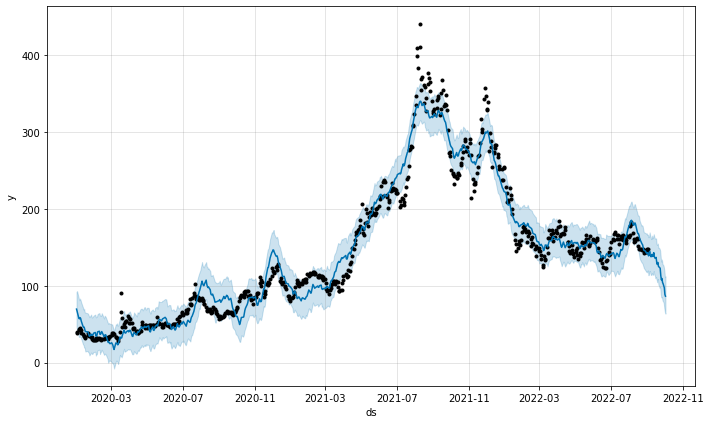

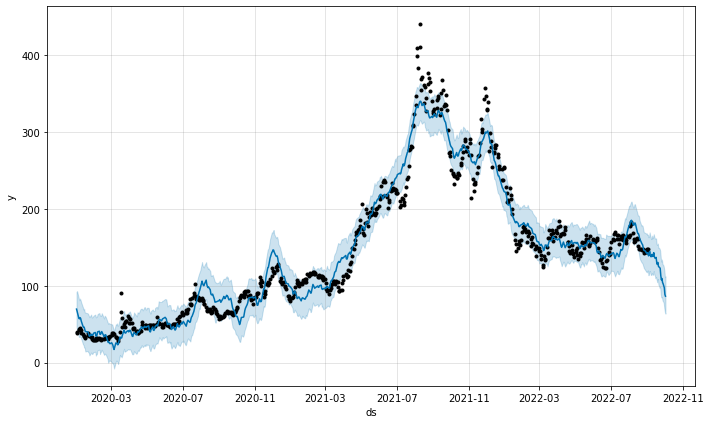

In [14]:
prophet_model.plot(forcast)

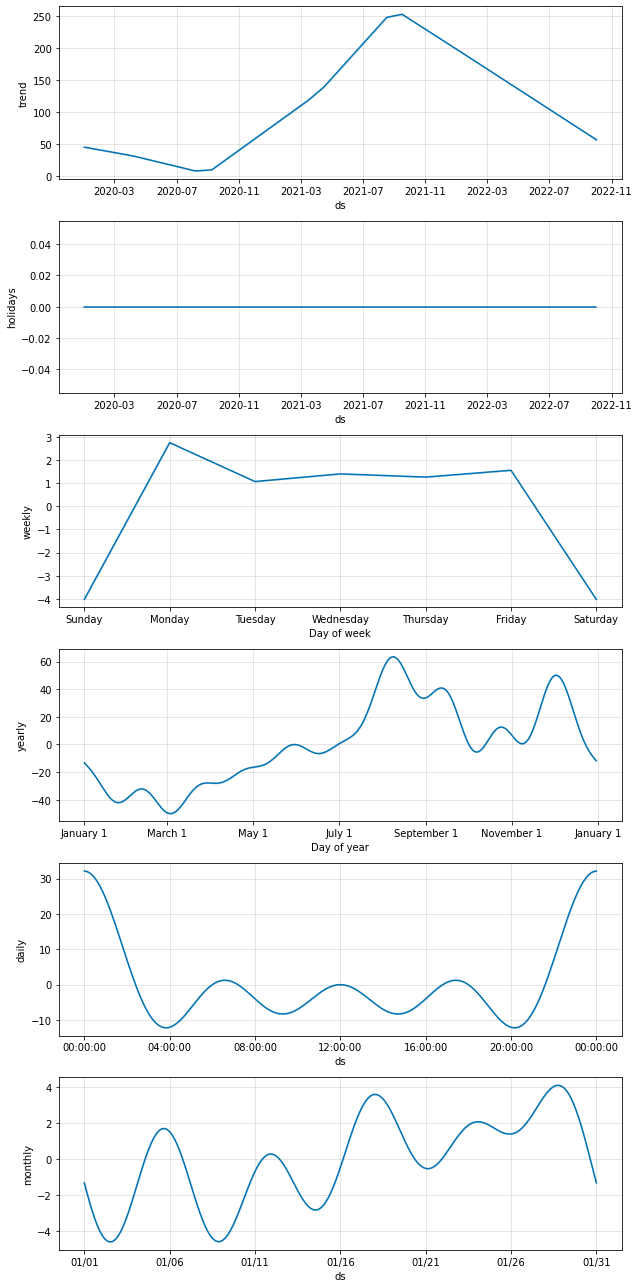

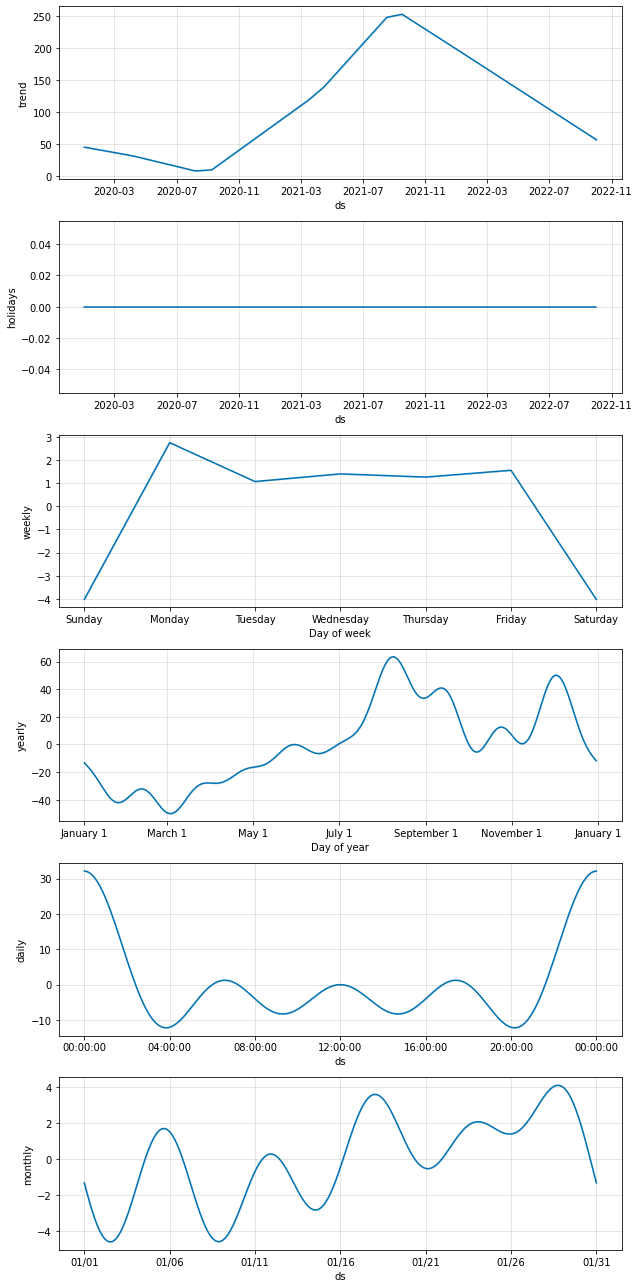

In [15]:
prophet_model.plot_components(forcast)

In [16]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
699,2022-09-28,102.628251,79.733132,127.719827
700,2022-09-29,100.298077,77.523517,125.244861
701,2022-09-30,97.563435,71.030354,120.787345
702,2022-10-01,88.736350,65.684431,111.709482
703,2022-10-02,86.482039,63.749559,112.546721


In [17]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df1_cv = cross_validation(prophet_model, horizon='180 days')
df1_cv.head()


INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-09-07 00:00:00 and 2022-03-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-08,346.710448,326.039456,365.898915,331.844666,2021-09-07
1,2021-09-09,351.810774,332.552069,370.352609,346.786774,2021-09-07
2,2021-09-10,354.248676,335.965950,372.519304,344.625397,2021-09-07
3,2021-09-13,347.854388,329.646988,366.300332,322.863647,2021-09-07
4,2021-09-14,350.106010,330.432897,368.514559,330.502441,2021-09-07


In [18]:
df1_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-08,346.710448,326.039456,365.898915,331.844666,2021-09-07
1,2021-09-09,351.810774,332.552069,370.352609,346.786774,2021-09-07
2,2021-09-10,354.248676,335.965950,372.519304,344.625397,2021-09-07
3,2021-09-13,347.854388,329.646988,366.300332,322.863647,2021-09-07
4,2021-09-14,350.106010,330.432897,368.514559,330.502441,2021-09-07
...,...,...,...,...,...,...
369,2022-08-29,134.172307,80.548387,186.645923,144.630005,2022-03-06
370,2022-08-30,131.046843,75.204725,186.136764,147.080002,2022-03-06
371,2022-08-31,130.543375,76.065962,186.109756,144.639999,2022-03-06
372,2022-09-01,130.966347,75.882038,186.943192,147.809998,2022-03-06


In [19]:
df1_p = performance_metrics(df1_cv)
df1_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,17 days,624.492573,24.989849,21.099920,0.086231,0.089918,0.621622
1,18 days,627.939289,25.058717,21.197684,0.087321,0.089918,0.621622
2,19 days,621.058629,24.921048,21.076200,0.087355,0.089918,0.630631
3,20 days,788.396196,28.078394,22.835635,0.092664,0.091529,0.612613
4,21 days,1102.481366,33.203635,25.513832,0.102359,0.091341,0.603604


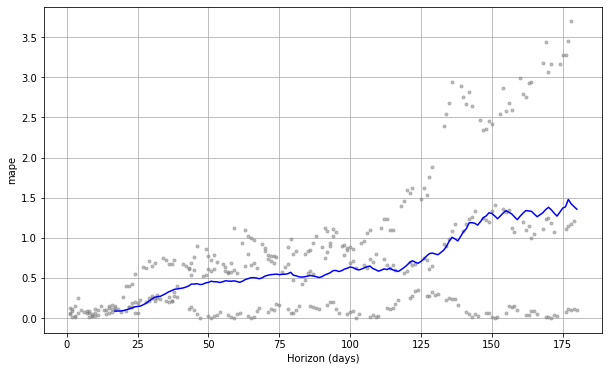

In [20]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df1_cv, metric='mape')

# JNJ

In [21]:
df2.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [22]:
prophet_model.fit(df2)

In [23]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()


,ds
699,2022-09-28
700,2022-09-29
701,2022-09-30
702,2022-10-01
703,2022-10-02


In [24]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
699,2022-09-28,165.897518,158.876119,167.888644,165.554774,166.148027,0.0,0.0,0.0,0.0,...,0.286968,0.286968,0.286968,-6.316725,-6.316725,-6.316725,0.0,0.0,0.0,163.265803
700,2022-09-29,165.902142,158.550698,167.625677,165.535168,166.178028,0.0,0.0,0.0,0.0,...,0.140886,0.140886,0.140886,-6.421567,-6.421567,-6.421567,0.0,0.0,0.0,163.016440
701,2022-09-30,165.906766,157.878111,167.286948,165.523100,166.219414,0.0,0.0,0.0,0.0,...,0.192381,0.192381,0.192381,-6.512248,-6.512248,-6.512248,0.0,0.0,0.0,162.518119
702,2022-10-01,165.911390,156.658142,165.756099,165.492301,166.250895,0.0,0.0,0.0,0.0,...,-0.380070,-0.380070,-0.380070,-6.591110,-6.591110,-6.591110,0.0,0.0,0.0,161.265323
703,2022-10-02,165.916014,156.084192,165.336514,165.471008,166.281055,0.0,0.0,0.0,0.0,...,-0.380070,-0.380070,-0.380070,-6.660677,-6.660677,-6.660677,0.0,0.0,0.0,160.891458


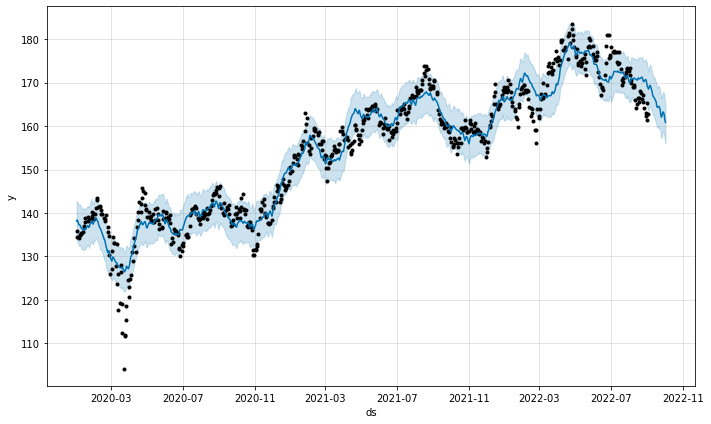

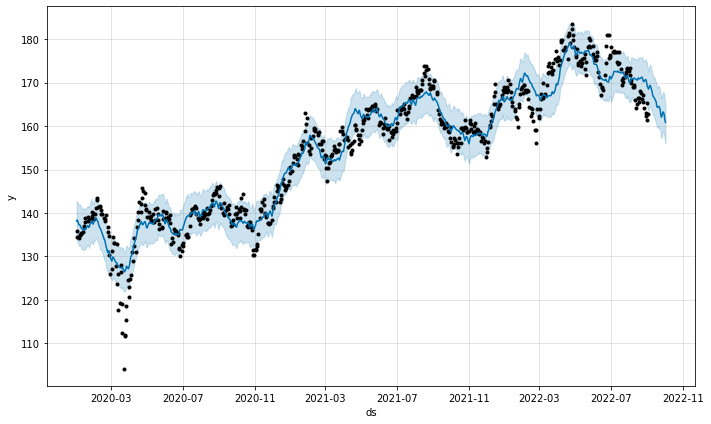

In [25]:
prophet_model.plot(forcast)

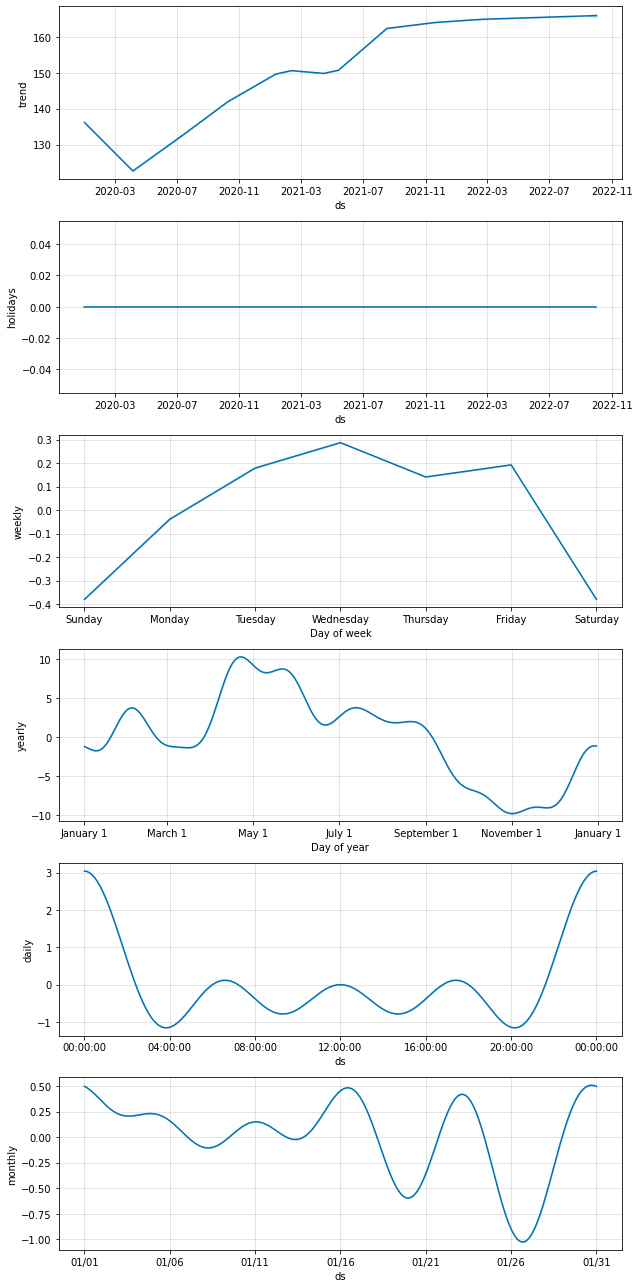

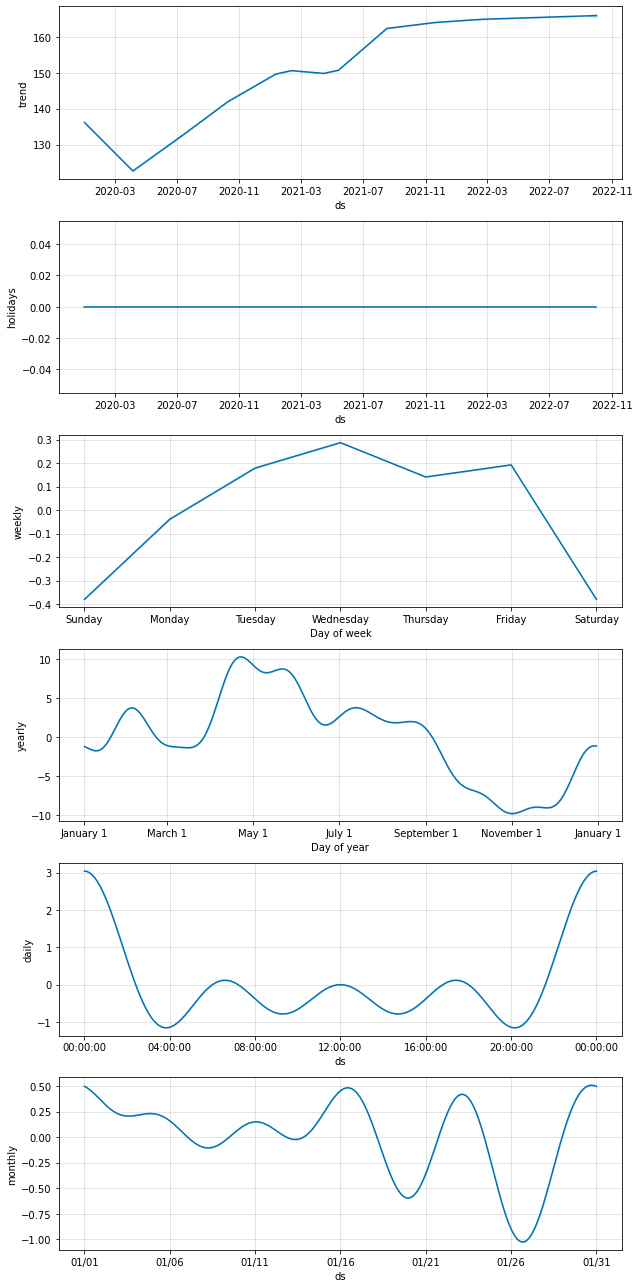

In [26]:
prophet_model.plot_components(forcast)

In [27]:
forcast.shape

(704, 73)

In [28]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
699,2022-09-28,163.265803,158.876119,167.888644
700,2022-09-29,163.016440,158.550698,167.625677
701,2022-09-30,162.518119,157.878111,167.286948
702,2022-10-01,161.265323,156.658142,165.756099
703,2022-10-02,160.891458,156.084192,165.336514


In [29]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df2_cv = cross_validation(prophet_model, horizon='180 days')
df2_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-09-07 00:00:00 and 2022-03-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-08,169.559512,165.924371,173.319810,167.483292,2021-09-07
1,2021-09-09,169.492511,165.910445,173.095884,163.751709,2021-09-07
2,2021-09-10,169.151084,165.262313,173.092285,162.679977,2021-09-07
3,2021-09-13,166.740929,162.904731,170.347449,161.540039,2021-09-07
4,2021-09-14,167.022723,163.239512,170.719747,160.565735,2021-09-07


In [30]:
df2_p = performance_metrics(df2_cv)
df2_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,17 days,103.579194,10.177386,8.193454,0.048768,0.041330,0.234234
1,18 days,113.080821,10.633947,8.599119,0.051095,0.041330,0.216216
2,19 days,124.912579,11.176430,9.047771,0.053618,0.041330,0.207207
3,20 days,125.744004,11.213563,9.127954,0.054154,0.041857,0.198198
4,21 days,126.269379,11.236965,9.156403,0.054386,0.042225,0.207207


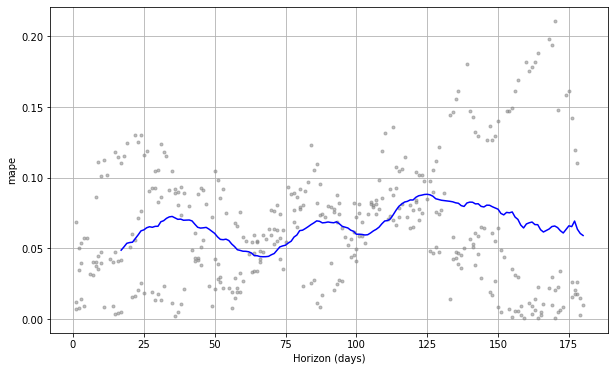

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df2_cv, metric='mape')

# MRNA

In [32]:
df3.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [33]:
prophet_model.fit(df3)

In [34]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
699,2022-09-28
700,2022-09-29
701,2022-09-30
702,2022-10-01
703,2022-10-02


In [35]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
699,2022-09-28,75.125930,105.899941,156.237090,71.827743,79.001152,0.0,0.0,0.0,0.0,...,0.448147,0.448147,0.448147,32.149615,32.149615,32.149615,0.0,0.0,0.0,132.644890
700,2022-09-29,74.667911,103.846043,153.928763,71.134333,78.955211,0.0,0.0,0.0,0.0,...,0.746234,0.746234,0.746234,28.095131,28.095131,28.095131,0.0,0.0,0.0,128.700812
701,2022-09-30,74.209893,100.079046,149.367683,70.203117,78.782870,0.0,0.0,0.0,0.0,...,1.216792,1.216792,1.216792,24.180900,24.180900,24.180900,0.0,0.0,0.0,122.703747
702,2022-10-01,73.751875,87.788186,138.466418,69.433171,78.744329,0.0,0.0,0.0,0.0,...,-2.632314,-2.632314,-2.632314,20.475807,20.475807,20.475807,0.0,0.0,0.0,112.525631
703,2022-10-02,73.293856,83.947489,136.059883,68.696798,78.566322,0.0,0.0,0.0,0.0,...,-2.632314,-2.632314,-2.632314,17.042576,17.042576,17.042576,0.0,0.0,0.0,108.636515


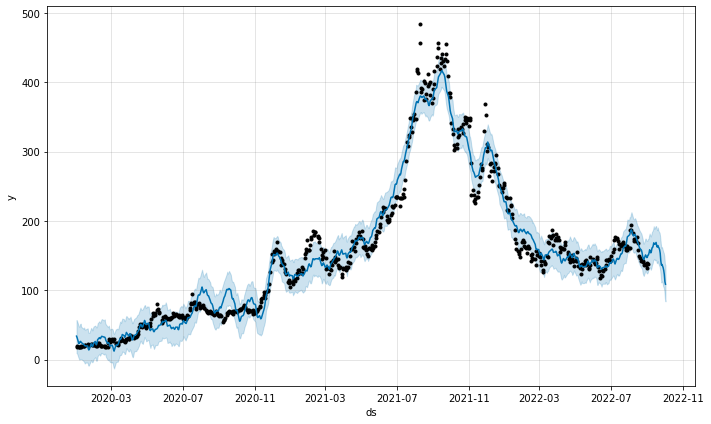

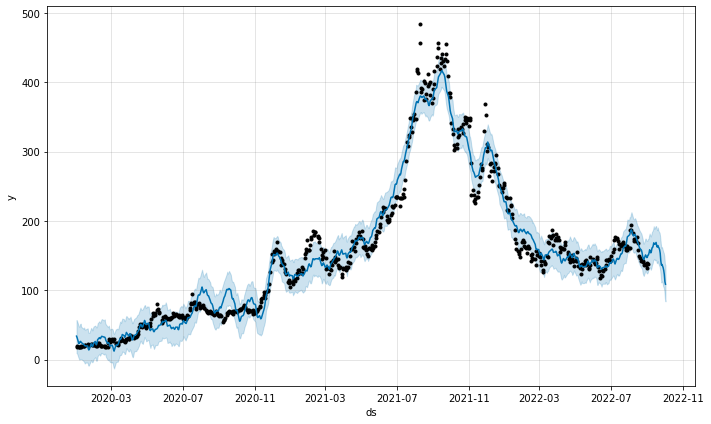

In [36]:
prophet_model.plot(forcast)

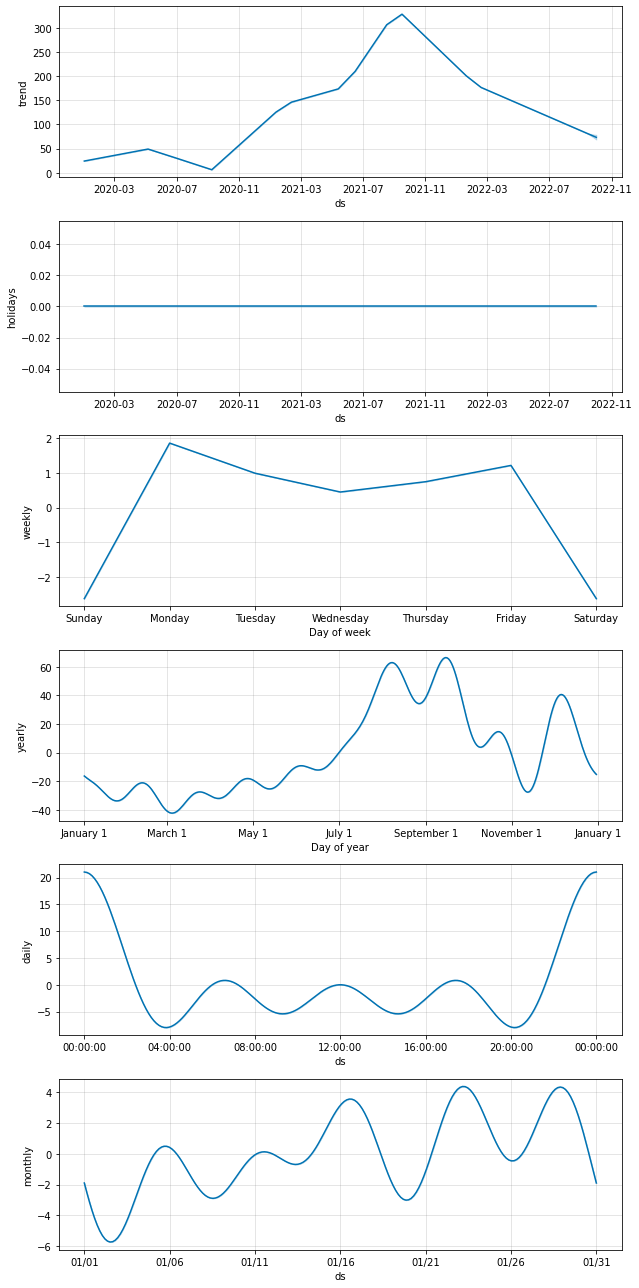

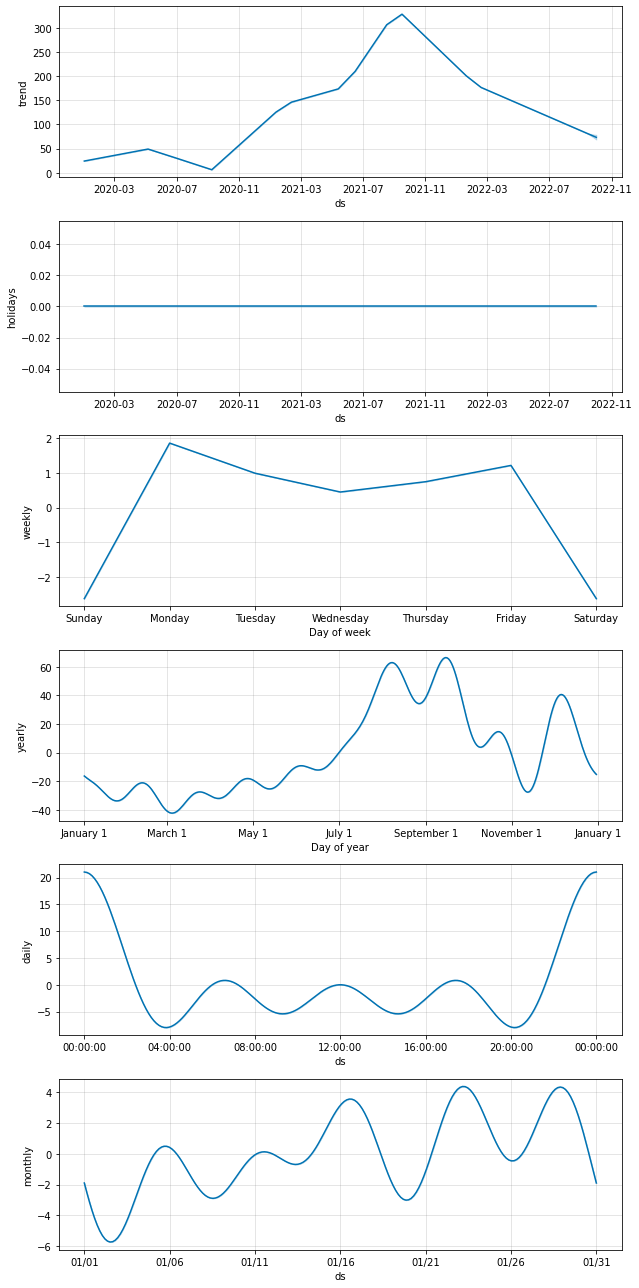

In [37]:
prophet_model.plot_components(forcast)

In [38]:
forcast.shape

(704, 73)

In [39]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
699,2022-09-28,132.644890,105.899941,156.237090
700,2022-09-29,128.700812,103.846043,153.928763
701,2022-09-30,122.703747,100.079046,149.367683
702,2022-10-01,112.525631,87.788186,138.466418
703,2022-10-02,108.636515,83.947489,136.059883


In [40]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df3_cv = cross_validation(prophet_model, horizon='180 days')
df3_cv.head()



INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-09-07 00:00:00 and 2022-03-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-08,421.444834,405.066919,439.163300,422.899994,2021-09-07
1,2021-09-09,428.271405,411.875886,444.300089,455.920013,2021-09-07
2,2021-09-10,432.460166,416.692092,450.165657,449.380005,2021-09-07
3,2021-09-13,433.354921,416.856572,450.120585,419.720001,2021-09-07
4,2021-09-14,438.248243,421.691178,455.487743,427.709991,2021-09-07


# PFE

In [41]:
df4.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [42]:
prophet_model.fit(df4)

In [43]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
699,2022-09-28
700,2022-09-29
701,2022-09-30
702,2022-10-01
703,2022-10-02


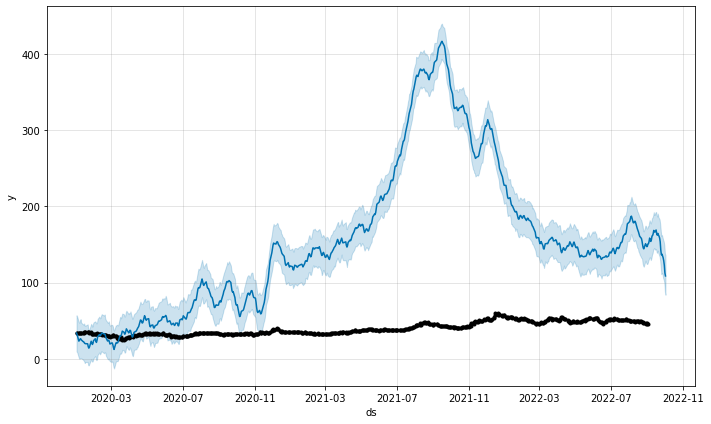

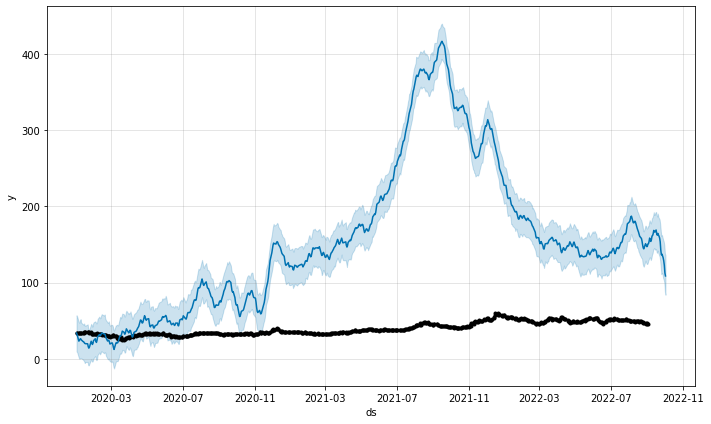

In [44]:
prophet_model.plot(forcast)

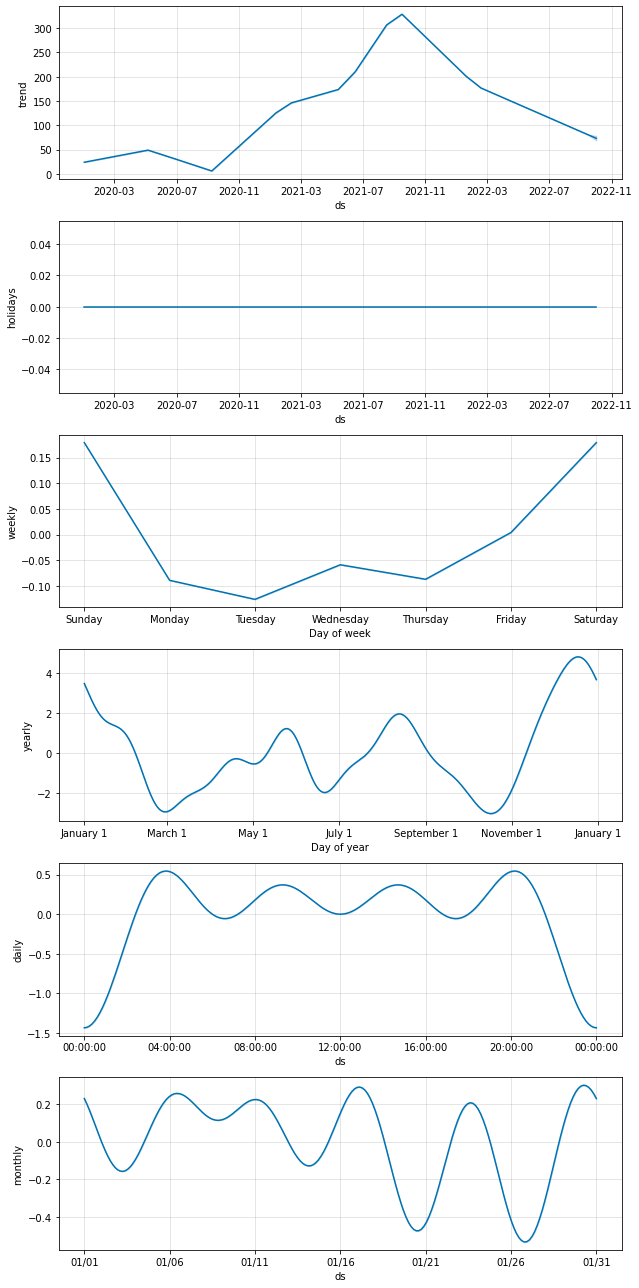

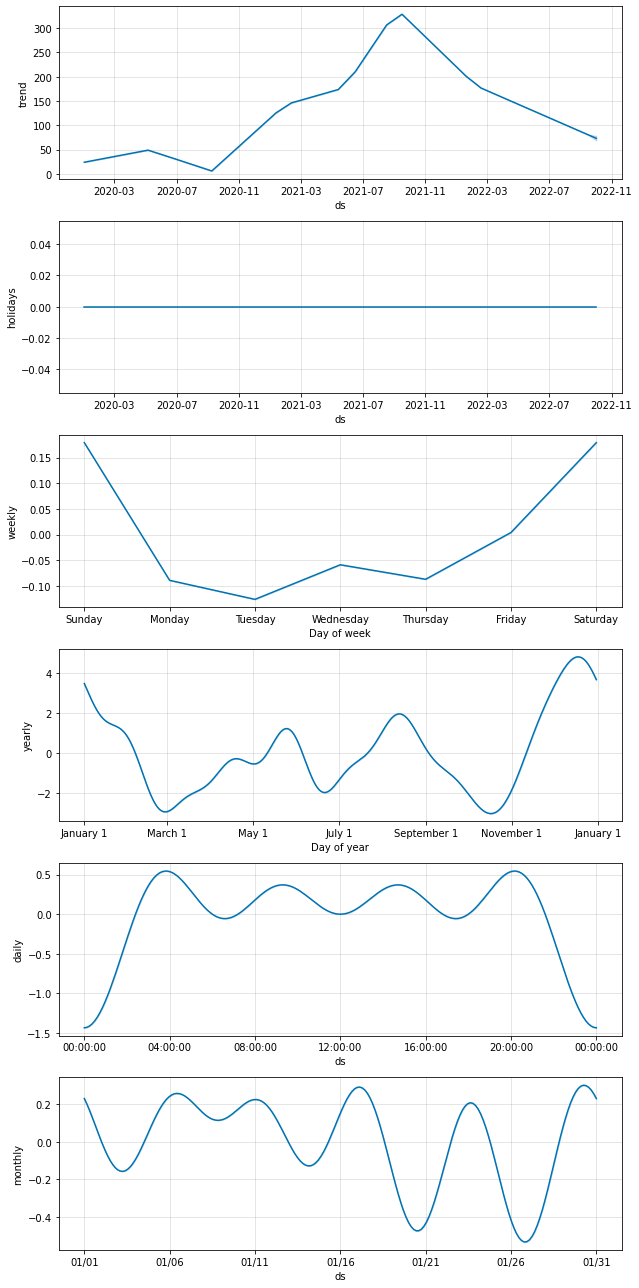

In [45]:
prophet_model.plot_components(forcast)

In [46]:
forcast.shape

(704, 73)

In [47]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
699,2022-09-28,132.644890,105.899941,156.237090
700,2022-09-29,128.700812,103.846043,153.928763
701,2022-09-30,122.703747,100.079046,149.367683
702,2022-10-01,112.525631,87.788186,138.466418
703,2022-10-02,108.636515,83.947489,136.059883


In [48]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df4_cv = cross_validation(prophet_model, horizon='180 days')
df4_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-09-07 00:00:00 and 2022-03-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-08,44.985942,43.880946,46.072225,45.037792,2021-09-07
1,2021-09-09,45.045461,43.995658,46.102543,44.572987,2021-09-07
2,2021-09-10,45.051914,44.016088,46.088872,44.146912,2021-09-07
3,2021-09-13,44.762106,43.771458,45.839027,43.168888,2021-09-07
4,2021-09-14,44.951000,43.863275,45.991425,43.294769,2021-09-07


In [49]:
df4_p = performance_metrics(df4_cv)
df4_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,17 days,22.096367,4.700677,3.743462,0.071288,0.067323,0.243243
1,18 days,22.616689,4.755701,3.850893,0.073352,0.068573,0.216216
2,19 days,23.216342,4.818334,3.957239,0.075363,0.070309,0.198198
3,20 days,23.526495,4.850412,4.028829,0.077128,0.074467,0.180180
4,21 days,26.797536,5.176634,4.378646,0.083811,0.079053,0.135135


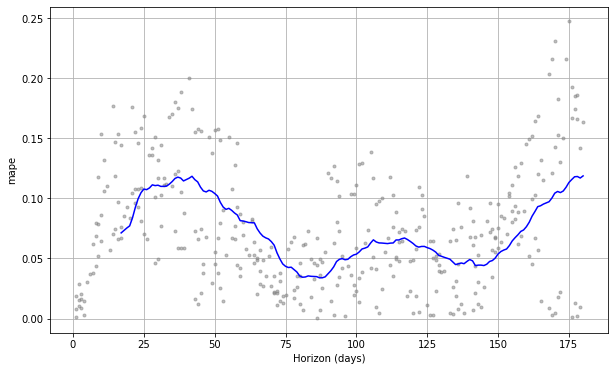

In [50]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df4_cv, metric='mape')